# Fantasy Creatures Classfier

An image classification project to classify 30 different types of fantasy creatures. These are:
1. Angel  
2. Basilisk  
3. Centaur  
4. Chimera  
5. Cyclops  
6. Demon  
7. Dragon  
8. Dwarf  
9. Elf  
10. Fairy  
11. Fire Elemental  
12. Genie  
13. Ghost  
14. Goblin  
15. Golem  
16. Griffin  
17. Hydra  
18. Kraken  
19. Lich  
20. Mermaid  
21. Minotaur  
22. Orc  
23. Pegasus  
24. Phoenix  
25. Unicorn  
26. Water Elemental  
27. Werewolf  
28. Wizard  
29. Wraith  
30. Zombie

# Setting Up Necessary Things



In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 8 # batch size

In [ ]:
!pip install -Uqq fastai fastbook nbdev

In [ ]:
from fastai import *
from fastbook import *
from fastai.vision.all import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Projects/Fantasy Creatures Classifier

/content/drive/MyDrive/Projects/Fantasy Creatures Classifier


# Download Images using DuckDuckGo

In [ ]:
fantasy_creatures = [
    "Dragon", "Goblin", "Elf", "Dwarf", "Wizard", "Orc", "Fairy", "Griffin", "Golem", "Centaur",
    "Phoenix", "Unicorn", "Pegasus", "Chimera", "Hydra", "Minotaur", "Kraken", "Mermaid", "Cyclops", "Basilisk",
    "Werewolf", "Ghost", "Zombie", "Lich", "Demon", "Wraith", "Genie",
    "Fire Elemental", "Water Elemental", "Angel"
]

len(fantasy_creatures)

30

In [ ]:
images = search_images_ddg(fantasy_creatures[0])
f"No of Images => {len(images)} -- One Image URL => {images[0]}"

'No of Images => 200 -- One Image URL => https://as1.ftcdn.net/v2/jpg/06/31/32/08/1000_F_631320814_QhHCcdL2Ikpbahe5nEcoqhy0o37uPMuD.jpg'

In [ ]:
dest = "dragon.jpg"
download_url(images[0], dest, show_progress=False)

Path('dragon.jpg')

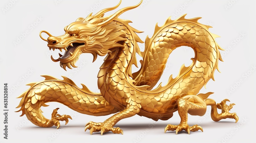

In [ ]:
image = Image.open(dest)
image.to_thumb(256,256)

In [ ]:
data_path = "data"
if not os.path.exists(data_path):
  os.mkdir(data_path)

for creature_type in fantasy_creatures:

  dest = f"{data_path}/{creature_type}"
  if not os.path.exists(dest):
    os.mkdir(dest)

  try:
    creature_image_urls = search_images_ddg(creature_type)
    download_images(dest, urls = creature_image_urls)

  except:
    continue

In [ ]:
image_counts = get_image_files(data_path)
image_counts

(#5133) [Path('data/Dragon/9183c009-f4ba-437b-8ad1-65788298c81b.jpg'),Path('data/Dragon/177de28a-edf5-4456-a712-aa58d98d9ed2.jpg'),Path('data/Dragon/90d8c24c-6004-4d4e-b7ff-f36d095b4f45.jpg'),Path('data/Dragon/0f3c7026-d533-4062-b941-62fa15e9d634.jpg'),Path('data/Dragon/fe0c0e5e-2b13-4cf2-932c-c272b126c583.jpg'),Path('data/Dragon/23905b55-dc9d-436d-ac2e-0b88c7d0e2de.png'),Path('data/Dragon/10f3f53e-5124-4bb8-873b-4393a172607d.jpeg'),Path('data/Dragon/2236918b-ee4b-4413-96b5-910185456191.jpg'),Path('data/Dragon/b9ee6568-97f8-4002-97a0-3bbaf4a7e8ba.jpg'),Path('data/Dragon/a300783d-b6ac-483a-871c-db256832d27d.jpg'),Path('data/Dragon/8cfe8b90-3f46-41eb-bc12-b58ecf63570c.jpg'),Path('data/Dragon/5d9f4579-5898-4405-8c58-d724147fcbf3.jpg'),Path('data/Dragon/27495b32-6597-457d-8789-7d82eea121ec.jpg'),Path('data/Dragon/e5611190-ccf2-4550-a6d5-82e7297137b6.jpg'),Path('data/Dragon/80132f17-59d6-4a49-b29b-e6b82f9fc8ee.jpg'),Path('data/Dragon/c5f3f2cd-be7f-42f0-99fe-3bfd5771b524.jpeg'),Path('data/Dr

In [ ]:
failed = verify_images(image_counts)
failed

(#306) [Path('data/Dragon/01690be3-fabe-4fe2-9e39-48a110253c7e.jpg'),Path('data/Dragon/17a328bc-072f-4a76-b42f-0a399f1b7265.jpg'),Path('data/Dragon/38a6fbb0-ad2b-4008-bd51-9eb21dc44570.jpg'),Path('data/Dragon/821afb12-63b6-4de1-9116-61320adf5327.jpg'),Path('data/Dragon/b30f4907-b022-4f9b-abdb-573f647406ae.jpg'),Path('data/Dragon/3b4bb118-22fd-4955-8826-8c1deed9c6ea.jpg'),Path('data/Dragon/42a7d0be-03f3-4b68-8b71-bdbbee052408.JPG'),Path('data/Dragon/093fc2c3-8696-4325-9704-0a8fc71d958b.jpg'),Path('data/Dragon/e3129abf-d1e5-4a14-9662-23b1c64ac178.jpg'),Path('data/Goblin/a7fc3cee-d134-4bd6-afac-b617045590b8.jpg'),Path('data/Goblin/2ba4488c-e695-49eb-8aad-a6b892ceaabd.jpg'),Path('data/Goblin/0c5429fb-ab62-456c-bce8-75c371812944.jpg'),Path('data/Goblin/64d2a687-3117-499c-9579-24ae83cbce50.png'),Path('data/Goblin/6fbba2bd-b0b7-4230-b791-0734a81889b0.jpg'),Path('data/Goblin/faed029a-b7c3-4ae9-b3af-e0ad41d82ab4.jpg'),Path('data/Goblin/a589f67b-abb4-49a3-b1dd-ebf8f7b93b16.jpeg'),Path('data/Gobl

In [ ]:
failed.map(Path.unlink)

(#306) [None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None...]

# From Data to Data Loaders

In [ ]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.1, seed=42),
    get_y=parent_label,
    item_tfms=Resize(256))

In [ ]:
data_path = "data"

In [ ]:
dls = dblock.dataloaders(data_path,bs=bs)

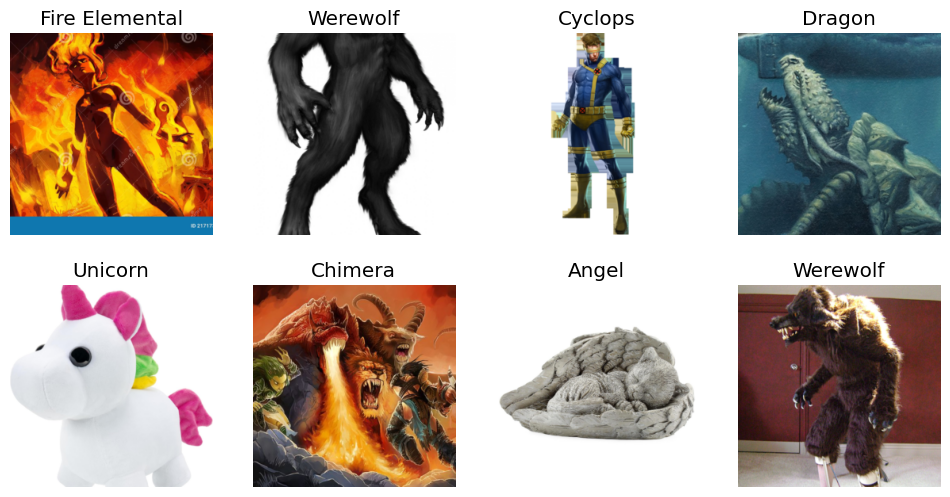

In [ ]:
dls.train.show_batch(max_n=10, nrows=2)

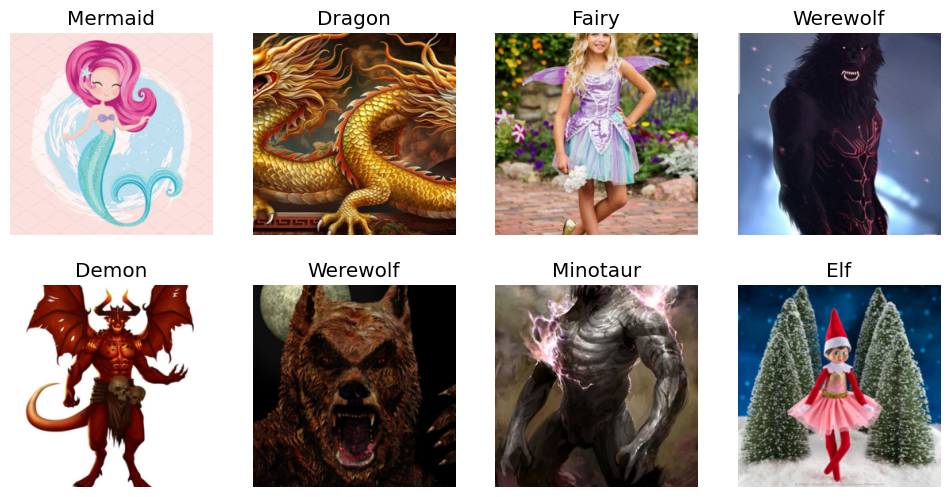

In [ ]:
dls.valid.show_batch(max_n=10, nrows=2)

# Data Augmentation

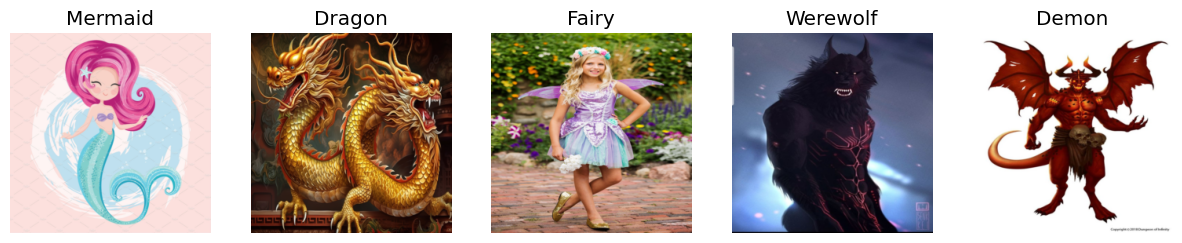

In [ ]:
dblock = dblock.new(item_tfms=Resize(256, ResizeMethod.Squish))
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=5, nrows=1)

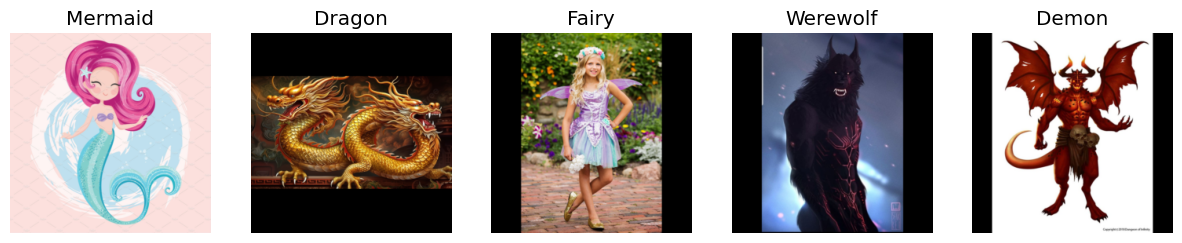

In [ ]:
dblock = dblock.new(item_tfms=Resize(256, ResizeMethod.Pad, pad_mode='zeros'))
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=5, nrows=1)

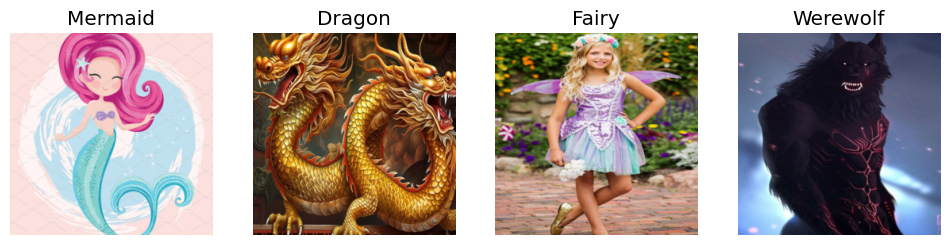

In [ ]:
dblock = dblock.new(item_tfms=RandomResizedCrop(256, min_scale=0.3))
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

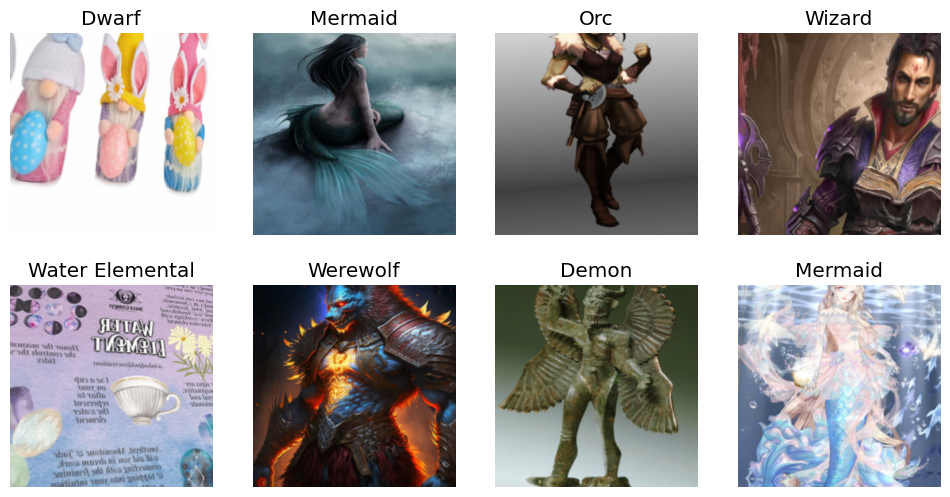

In [ ]:
dblock = dblock.new(item_tfms=RandomResizedCrop(256, min_scale=0.5), batch_tfms=aug_transforms())
dls = dblock.dataloaders(data_path)
dls.train.show_batch(max_n=10, nrows=2)

In [ ]:
torch.save(dls, "creatures_dataloader_v0.pkl")